<img src="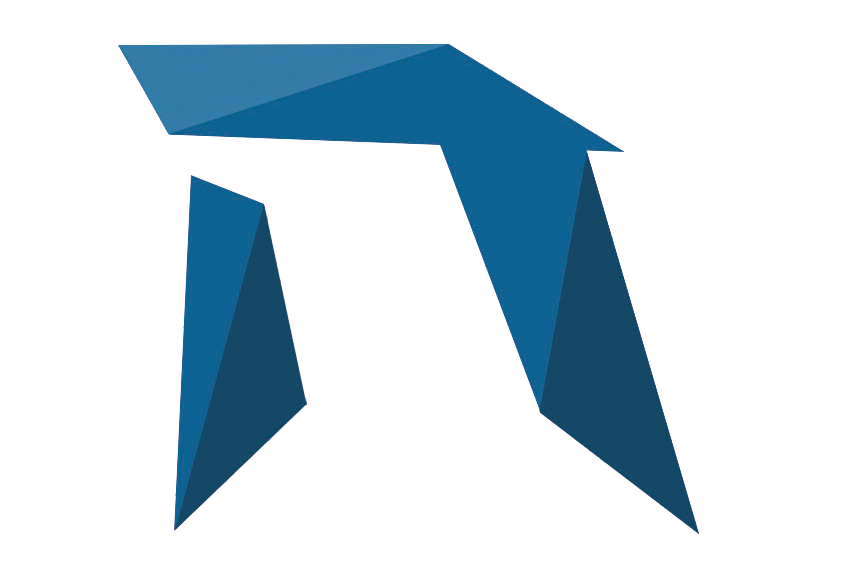
" style="width:125px;height:85px">

***
# HEICODERS ACADEMY
<b>AI200: Applied Machine Learning</b><br>
***
<b>Take-Home Assignment 4:</b> Classification Problems in Machine Learning [15 Marks]
***

<b>Learning Outcomes:</b>

- Practice on the implementations of the following classification models:
    - Logistic Regression
    - K-Nearest Neighbours (KNN)
    - Support Vector Machines (SVM)
- Evaluate and compare classification models with a variety of metrics:
    - Accuracy
    - Sensitivity
    - Specificity
    - Precision
    - Recall
    - Receiver Operating Characteristic (ROC) Curve
    - Area Under ROC Curve metric
- Implement train-test split and cross-validation for classifier models

<b>Important Information about Assignment:</b>

The focus of this assignment is to ensure that :
- you get adequate practice in the implementation of different types of classification models
- strengthen your intuition for applying classification modelling to solving real world problems

<b>Note:</b>

- This exercise accounts for 15% of the entire course [15 marks]. **There is an extra credit question worth 3 bonus marks!**
- To help you check your answers, we have provided the expected output you are supposed to get for each question.
- Lastly, have fun, and approach your assigned TA if you need help!

<div class="alert alert-block alert-success">
<b>Student Score:</b>  / 15 mark
  
<b>Teaching Assistant Comment:</b>
</div>    

<div class="alert alert-block alert-warning">

<b>Before you submit</b>
- <b>Student Name:</b> _Fill in your name here_
- _Rename this Jupyter Notebook in the following format before you submit it_ e.g. `John_Doe_Assignment4.ipynb`
    
    
    FirstName_LastName_Assignment4.ipynb

        
</div>

Case Study: Prediction of Insurance Claims for Heart Diseases
---

The cost of insurance claims is rising at an exponential rate on an year-on-year basis. Part of the reason is because the new generation's relatively sedentary lifestyle have made them more subsceptible to certain illness such as heart diseases. In this assignment, we will be helping an insurance firm build a machine learning model to help detect heart diseases prior to its onset in their clients or even before they onboard potential clients. With this, the insurance firm will then be able to better manage the cost of insurance claims through - (1) sponsorship of more regular health screening for such patients or (2) higher premiums for such high risks patients.

In this assignment, we will be using a new dataset on <b>Heart Disease</b>, compiled by the Cleveland Clinic Foundation. The following dataset comprises <b>303 observations, 13 features and 1 target attribute.</b> The 13 features include the results of the aforementioned non-invasive diagnostic tests along with other relevant patient information. The <b>target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing absence of CHD and labels 1-4 representing presence of CHD</b>. Most research using this dataset have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). This is part of the dataset which researchers are actually using for research on heart diseases.

Here are the detailed description of what each dataset column is about:

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the
hospital)
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)
- thal: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
- <b>target: outcome variable</b> representing whether a client is likely to make an insurance claim due to heart disease
    - Value 0: < 50% of probability in client making such a claim
    - Value 1: > 50% of probability in client making such a claim

We will be storing the <b>dataset</b> into <code>insurance_clienthealth_df</code>. You must split the data in <code>insurance_clienthealth_df</code> into a training and test dataset, and then build and test your models on the train/test datasets respectively.

**Before you start on the assignment, please run ALL cells of code in this section.**<br>
If the below cell throws an error, please reach out to your assigned TA for help.

The code below reads the <b>training dataset</b> into  <code>insurance_clienthealth_df</code> 

In [1]:
## Run this cell before you begin
import pandas as pd

# We set max column and rows
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Read data from csv into pandas dataframe
insurance_clienthealth_df = pd.read_csv('data/insurance_health.csv')
insurance_clienthealth_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
insurance_clienthealth_df.shape

(303, 14)

Before we begin, we apply <code>.info()</code> to get a sense of the data type, as well as if there are any missing fields in the dataset

In [3]:
insurance_clienthealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We also apply <code>.describe()</code> to get a summary of the dataset

In [4]:
insurance_clienthealth_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Exploratory Data Analysis: 
---

Before you begin, we recommend for you to perform any EDA which you picked up from session 1-2 of this course. While no marks will be awarded in this section, this is a good opportunity for you to synthesize whatever you learnt earlier. <b>Feel free to add on any EDA analysis and codes below.</b> 

In [5]:
# Write your code below









<div class="alert alert-block alert-warning">
End of EDA Section. From this point onwards, all the questions will have marks awarded.
</div>

## Train-Test Split

In [6]:
## Run this cell before answering Q1 to Q5.

X = insurance_clienthealth_df.drop(columns=['target'])
y = insurance_clienthealth_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4) # You may use this for Q1-Q5

Question 1: Multiple Logistic Regression + Train-Test Split [2 Mark]
---

<br>
<div class="alert alert-block alert-info">

<b>Background:</b><br>
- As a data scientist at AIG, the management has tasked you to build a machine learning model that can diagnose heart disease in order to detect potential heart disease in their clients prior to its onset. After some discussion your team decides to build a logistic regression model that is capable of diagnosing heart disease.<br>
    
<b>User story:</b><br>
- Split the dataset into training (70%) and test (30%) dataset (or use the provided variables from the previous Train-Test Split section). <br>For the purpose of this exercise, you should set <code>random_state=4</code> so you can verify your answer against the expected output.<br>
- Train and evaluate the logistic regression model by calculating its accuracy and printing it out ([rounded](https://www.xspdf.com/help/50433806.html) to 4 decimal places)<br>
    - Make sure to set parameter <code>random_state=4</code> and <code>max_iter=1000</code> ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) <br><br>
 
- Expected output:<br><br>
<div style="margin-left:30px;background:white;">
    0.8132
</div><br>
- Alternative output:  (also accepted). <br><br>
<div style="margin-left:30px;background:white;">
    0.8242
</div>
    
<i>Note:</i> Your code output may have a small deviation from the expected outputs due to the way Logistics Regression is [implemented](https://stackoverflow.com/questions/24424440/sklearn-linear-model-logisticregression-returns-different-coefficients-every-tim) in the sklearn library.

In [7]:
## Write your code below








<div class="alert alert-block alert-warning">
What did you observe when you use <code>max_iter=300</code> instead?
</div>

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b>  / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

Question 2: Generate ROC Curve & Calculate AUC Metric [3 Mark]
---

<br>
<div class="alert alert-block alert-info">

<b>Background:</b><br>
- Your colleague has built a similar logistic regression model. The head of the data science department tasked you to generate a ROC & AUC curve based on the model developed by your colleague.<br>
    
<b>User story:</b><br>
- Using <b>plotly.express</b>, generate a ROC curve with the predicted probabilities of your colleague's models. The predicted probabilities are stored in <code>logreg_pred_probabilities</code>
- Print the AUC metric (rounded to 3 decimal places) in the title of your plotly chart.
- Modify the x-axis and y-axis labels to match the expected output.
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">
    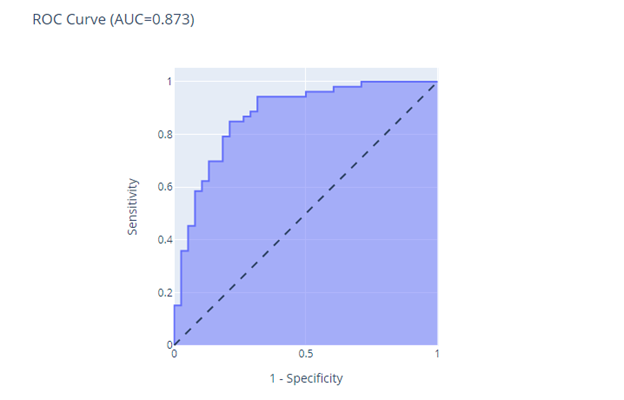
</div>

In [8]:
## Colleague's code below (Remember to run this cell first)

from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
logreg_pred_probabilities = logistic_reg_model.predict_proba(X_test)[:, 1]

print(logreg_pred_probabilities[0:10])   # Print first 10 predicted probabilities

[0.80720484 0.02299396 0.65233286 0.99142716 0.79983262 0.37491783
 0.27017808 0.96995163 0.64567314 0.79087062]


In [9]:
## Write your code below (to plot ROC Curve)











<div class="alert alert-block alert-warning">
Given the list of <code>y_pred_probabilities</code> from your colleague, are you able to calculate the accuracy metric?<br>
If not, why? What other information would you need to calculate this metric?
</div>

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b>  / 3 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

Question 3: Support Vector Machine + Train-Test Split [3 Mark]
---

<br>
<div class="alert alert-block alert-info">

<b>Background:</b><br>
- Your team decides to compare the performance of your Logistic Regression model from Q1 with a Support Vector Machine model this time.<br>
    
<b>User story:</b><br>
- Build a <b>support vector machine classifier</b> within the following constraints:<br>
    - You <u>must</u> use the same training and testing datasets (<code>X_train, X_test, y_train, y_test</code>) as the ones in Q1 for fair comparison. <br>ie, you should still use a 70-30 train-test split, and also <code>random_state=4</code><br>
    - Make sure to use the <code>linear</code> SVM kernel ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))<br>
- Evaluate your model predictions by calculating the accuracy and printing it out (rounded to 4 decimal places).<br><br>
 
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">
    0.8132
</div>

In [10]:
## Write your code below









<div class="alert alert-block alert-success">
<b>Marks Awarded:</b>  / 3 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

Question 4a: Support Vector Machine + K-Fold Cross Validation [4 Mark]
---

<br>
<div class="alert alert-block alert-info">

<b>Background:</b><br>
- Because cross-validation is more commonly used for data science teams, you have been tasked to evaluate the Support Vector Machine model from Question 3 with <b>4-Fold Cross Validation</b> this time.<br>

<b>User story:</b><br>
- Train <b>another support vector machine classifier</b> with a <code>linear</code> kernel.<br>
- This time, use k-fold cross-validation instead of the train-test split method to evaluate your model.<br>
- Train and test the model on <b>4 folds (k=4)</b> using [<code>sklearn.model_selection.Kfold</code>](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Make sure to <code>shuffle</code> your data with <code>random_state=4</code><br>
- Calculate the following metrics of all 4 folds and print them out (rounded to 4 decimal places): accuracy, sensitivity, specificity, precision and recall.<br>
 
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">
    Average 4-fold Accuracy: 0.8218<br>
    Average 4-fold Sensitivity: 0.8908<br>
    Average 4-fold Specificity: 0.7380<br>
    Average 4-fold Precision: 0.8039<br>
    Average 4-fold Recall: 0.8908
</div>


In [12]:
## Write your code below


















Question 4b: Support Vector Machine + K-Fold Cross Validation [1 Mark]
---

<div class="alert alert-block alert-info">
<b>User story:</b><br>
    
- On top of printing the average 4-fold metrics, try printing out the metrics from each individual fold.<br>
Now what happens when you change <code>shuffle=False</code> the KFold object? What does this parameter do?<br>
<ul>
    <li>Try googling if you need help understanding any errors that may arise.</li>
    <li>What do you think the <code>shuffle</code> parameter does? And why is it important?</li>
</ul>

<i>Important Note:</i> You should still ensure your submitted Q4 code matches the expected output!
</div>

In [ ]:
## Try it out below (you could start by pasting your Q4 code here)











<div class="alert alert-block alert-success">
<b>Marks Awarded:</b>  / 5 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

Question 5: KNN Model + Train-Test Split [2 Mark]
---

<br>
<div class="alert alert-block alert-info">

<b>Background:</b><br>
- Your team decides to compare the performance of your Logistic Regression and Support Vector Machine classifier model with another model, the K-Nearest Neighbours model.<br>
    
<b>User story:</b><br>
- Build a <b>10-Nearest Neighbours model</b> within the following constraints:<br>
    - You <u>must</u> use the same training and testing datasets (<code>X_train, X_test, y_train, y_test</code>) as the ones in Q1 for fair comparison. <br>ie, you should still use a 70-30 train-test split, and also <code>random_state=4</code><br>
- Train and evaluate your K-Nearest Neighbours model by calculating the accuracy on the test set.<br><br>
 
- Expected output:<br><br>

<div style="margin-left:30px;background:white;">
    0.6264
</div>

In [ ]:
## Write your code below










<div class="alert alert-block alert-warning">
Comparing the train-test split accuracy of 10-Nearest Neighbours Classifier and SVM Classifier on this dataset, which model performs better?<br>
</div>

<div class="alert alert-block alert-success">
<b>Marks Awarded:</b>  / 2 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

Question 6: Support Vector Machine Model Improvement [Bonus 3 Mark]
---

<br>
<div class="alert alert-block alert-info">

<b>Background:</b><br>
- The head of your data science team tasks you to improve on the Support Vector Machine model from Question 3 as he feels there is definitely area for improvement.<br>
- He wants you to generate some hypothesis on possible features that could have a strong relationship with the output feature (<code>target</code>)
- Assuming the model you developed in Question 3 is the baseline model, he wishes you to put your hypothesis to the test using A/B testing (with Accuracy as the metrics) to see if you can generate variant models whose performance exceeds the baseline model   
    
<b>User story:</b>
- Build <b>another <code>SVC</code> model</b> within the following constraints:<br>
    - You <b>should select your own set of features to train the model</b>. In fact, you are to <b>generate some hypothesis about features which will be relevant before you proceed to train the model</b>. We encourage you to make use of the EDA techniques you had learnt to help in your feature selection. Alternatively you can also make use of statistics or domain knowledge to substantiate your hypothesis<br>
    - You <b>should seek to tune your SVM model by tweaking its parameters</b>. We encourage you to check out the sklearn SVC documentation to help in this process.<br>
- Calculate <b>and print</b> the accuracy of your newly-trained model.<br>
- Briefly explain what parameters you changed, and how these parameters change the behaviour of your model.<br><br>
    
- <b>Marks will be awarded only if</b> you <br>
    - (1) 0.5 mark: Outperform the baseline model (printed accuracy output **higher than 0.8132**) without violating the stipulated constraints, and <br>
    - (2) 1 mark: Show that you used A/B testing to validate your hypothesis about the features. You are to generate at least 2 different variant model to test against the baseline model in question 1
    - (3) 1 mark: Provide explanation for your hypothesis along with adequate substantiation<br>
    - (4) 0.5 mark: Provide explaination for what you did to improve the model
</div>

<b>What are some features which you hypothesize will have a relationship wtih the output feature? What is your basis for this hypothesis? You may use visualisations/statistics/domain knowledge to substantial your hypothesis (1 mark) </b>

In [ ]:
## Write your hypothesis and substantiation (visualisation/statistics/domain knowledge) below (1 mark)







<b>Write the code of the first variant model which you are testing and indicate the hypothesis which this model is meant to test for (1 mark)</b>

In [ ]:
## Write your code below







<b>Write the code of the second variant model which you are testing and indicate the hypothesis which this model is meant to test for (1 mark). You may create more cells below if you wish to test more than 2 variants</b>

In [ ]:
## Write your code below







<b>Provide explanation for what you did to improve the model (0.5 mark)</b>


In [ ]:
## Write your explanation below (0.5 mark)










<div class="alert alert-block alert-success">
<b>Marks Awarded:</b>  / 3 mark
    
<b>Teaching Assistant Comment:</b>
</div>    

More Bonus HW4 Content
---

<div class="alert alert-block alert-info">
    
<u>Optional - for Advanced Students</u><br>
<ul>
<li>With reference to <a href="https://plotly.com/python/roc-and-pr-curves/">plotly ROC curve documentation</a>, try to recreate the following plot with the models you had trained above.</li>
<li>AUC values may differ slightly from person to person depending on how you trained the models.</li>
<li>You may choose to add additional models like Decision Tree Classifier to the chart.</li>
</ul><br>
<i>Encounter an error? Try to see if google has a solution for that :)</i>
</div>

<div style="margin-left:30px;background:white;">
    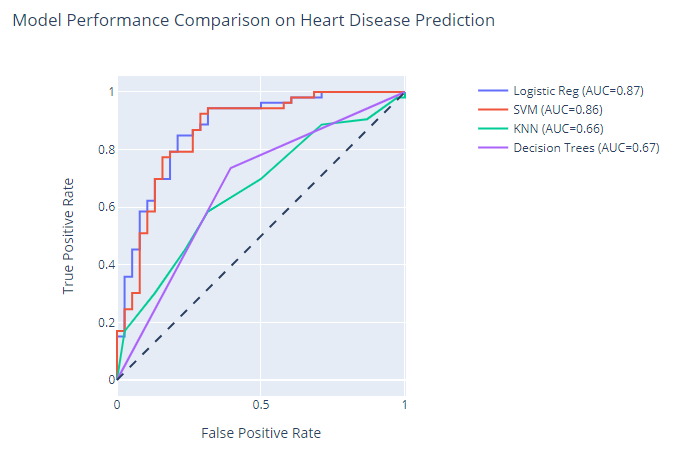</div>

<div class="alert alert-block alert-warning">
Notice that the AUC metrics of Logistic Regression and SVM Classifier are very close, and the same for KNN & Decision Trees.<br>
<ul>
<li>Try a different <code>random_state</code> on the train-test split used for all models this time. Does this change the result?</li>
<li>What does this say about the reliability of Cross Validation vs Train-Test split as evaluation techniques?</li>
</ul>